In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve

In [207]:
data = pd.read_csv("data.csv")
data.count()

Name                 3152
Branch               3154
Date                 3154
Brand                3154
Category             3154
Quantity             3154
Price                3154
TotalSales           3154
BranchProximity      3154
FestivalOffer        3154
ActualVisits         3154
ProductsPurchased    3154
Visitday             3154
VisitPossibleNot     3154
CustomerType         3154
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

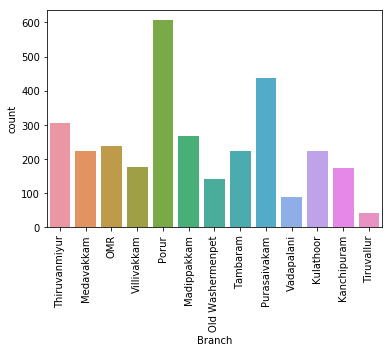

In [208]:
sns.countplot(data.Branch)
plt.xticks(rotation=90)

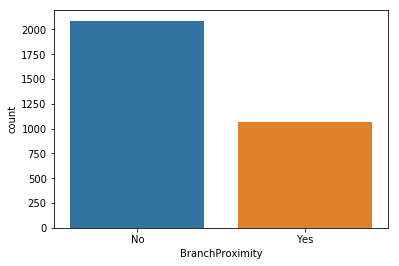

In [209]:
sns.countplot(data.BranchProximity)

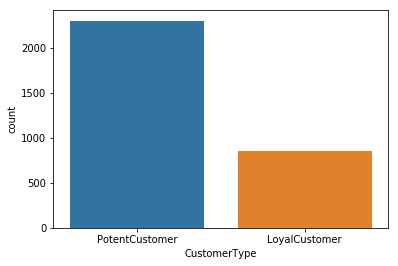

In [210]:
sns.countplot(data.CustomerType)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

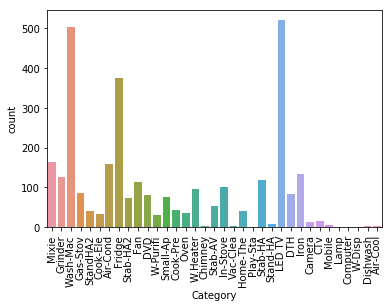

In [211]:
sns.countplot(data.Category)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

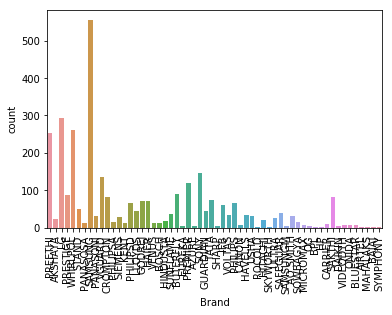

In [212]:
sns.countplot(data.Brand)
plt.xticks(rotation=90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

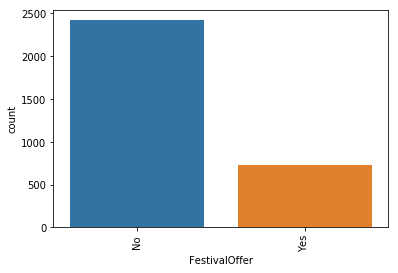

In [213]:
sns.countplot(data.FestivalOffer)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

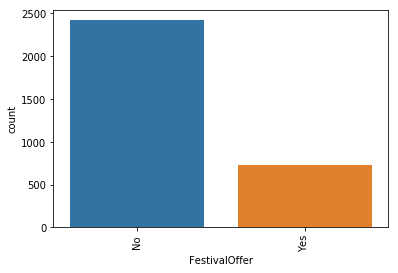

In [214]:
sns.countplot(data.FestivalOffer)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

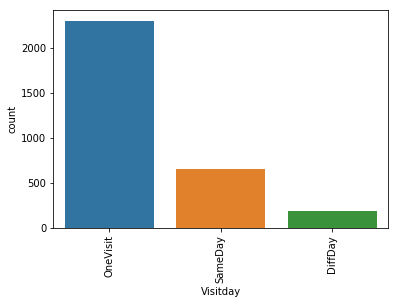

In [215]:
sns.countplot(data.Visitday)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

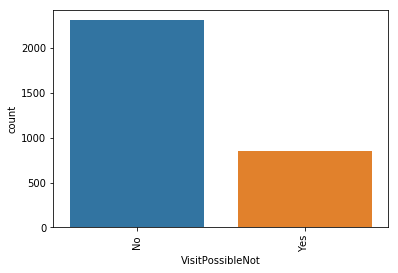

In [216]:
sns.countplot(data.VisitPossibleNot)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

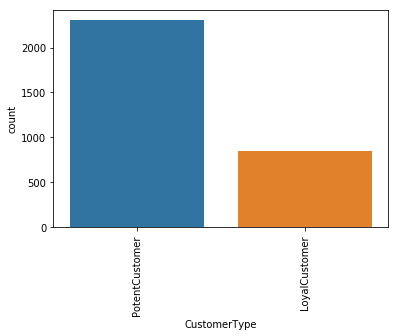

In [217]:
sns.countplot(data.CustomerType)
plt.xticks(rotation=90)

In [218]:
data.head(10)

,Name,Branch,Date,Brand,Category,Quantity,Price,TotalSales,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,VisitPossibleNot,CustomerType
0,KUMARESAN.T,Thiruvanmiyur,28-Jan-14,PREETHI,Mixie,1,"4,344","4,344",No,No,1,1,OneVisit,No,PotentCustomer
1,KARTHIKEYAN,Medavakkam,28-Jan-14,AKSHAYA,Grinder,1,2380.95,2380.95,No,No,1,2,SameDay,Yes,LoyalCustomer
2,S.RAJMOHAN,OMR,29-Jan-14,PREETHI,Mixie,1,2620.09,2620.09,No,No,1,1,OneVisit,No,PotentCustomer
3,VENKATARAMANI.M.S,Villivakkam,29-Jan-14,LG,Wash-Mac,1,16157.21,16157.21,No,No,1,1,OneVisit,No,PotentCustomer
4,ARUNKUMAR,Porur,29-Jan-14,PREETHI,Mixie,1,3100.44,3100.44,Yes,No,1,1,OneVisit,No,PotentCustomer
5,JEYACHANTRAN AR,Madippakkam,30-Jan-14,PRESTIGE,Gas-Stov,1,5109.17,5109.17,Yes,No,2,3,DiffDay,Yes,LoyalCustomer
6,PRASANA PRABHU,Medavakkam,30-Jan-14,WHIRLPOL,Wash-Mac,1,14192.14,14192.14,No,No,1,1,OneVisit,No,PotentCustomer
7,GEETHA.N,Old Washermenpet,30-Jan-14,PREETHI,Mixie,1,3100.44,3100.44,Yes,No,1,1,OneVisit,No,PotentCustomer
8,PARTHA SARATHI,Tambaram,31-Jan-14,STAND,StandHA2,1,285.71,285.71,No,No,1,1,OneVisit,No,PotentCustomer
9,MUTHU RAMALINGAM,Porur,31-Jan-14,LG,Wash-Mac,1,13580.79,13580.79,Yes,No,1,1,OneVisit,No,PotentCustomer


In [219]:
print ("Dataset Length: ", len(data))
print ("Dataset Shape: ", data.shape)

Dataset Length:  3154
Dataset Shape:  (3154, 15)


In [220]:
data.describe()

,Quantity,ActualVisits,ProductsPurchased
count,3154.000000,3154.000000,3154.000000
mean,14.690869,1.071021,1.429296
std,147.831055,0.313605,0.933693
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,4940.000000,6.000000,14.000000


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 15 columns):
Name                 3152 non-null object
Branch               3154 non-null object
Date                 3154 non-null object
Brand                3154 non-null object
Category             3154 non-null object
Quantity             3154 non-null int64
Price                3154 non-null object
TotalSales           3154 non-null object
BranchProximity      3154 non-null object
FestivalOffer        3154 non-null object
ActualVisits         3154 non-null int64
ProductsPurchased    3154 non-null int64
Visitday             3154 non-null object
VisitPossibleNot     3154 non-null object
CustomerType         3154 non-null object
dtypes: int64(3), object(12)
memory usage: 369.7+ KB


In [222]:
X= data[['Branch','Quantity','BranchProximity','FestivalOffer','ActualVisits','ProductsPurchased','Visitday','CustomerType']]

In [223]:
X.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
0,Thiruvanmiyur,1,No,No,1,1,OneVisit,PotentCustomer
1,Medavakkam,1,No,No,1,2,SameDay,LoyalCustomer
2,OMR,1,No,No,1,1,OneVisit,PotentCustomer
3,Villivakkam,1,No,No,1,1,OneVisit,PotentCustomer
4,Porur,1,Yes,No,1,1,OneVisit,PotentCustomer


In [224]:
y=data[['VisitPossibleNot']]

In [225]:
y.head()

,VisitPossibleNot
0,No
1,Yes
2,No
3,No
4,No


In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [227]:
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,Madippakkam,1,Yes,Yes,1,2,SameDay,LoyalCustomer
3123,Kulathoor,1,No,No,1,1,OneVisit,PotentCustomer
1072,Villivakkam,1,No,Yes,1,1,OneVisit,PotentCustomer
2638,Medavakkam,1,No,Yes,1,1,OneVisit,PotentCustomer
3046,Madippakkam,1,Yes,No,1,3,SameDay,LoyalCustomer


In [228]:
y_train.head()

,VisitPossibleNot
1875,Yes
3123,No
1072,No
2638,No
3046,Yes


In [229]:
combine=[X_train,X_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['BranchProximity']=data['BranchProximity'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,Madippakkam,1,0,Yes,1,2,SameDay,LoyalCustomer
3123,Kulathoor,1,1,No,1,1,OneVisit,PotentCustomer
1072,Villivakkam,1,1,Yes,1,1,OneVisit,PotentCustomer
2638,Medavakkam,1,1,Yes,1,1,OneVisit,PotentCustomer
3046,Madippakkam,1,0,No,1,3,SameDay,LoyalCustomer


In [230]:
combine=[X_train,X_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['FestivalOffer']=data['FestivalOffer'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,Madippakkam,1,0,0,1,2,SameDay,LoyalCustomer
3123,Kulathoor,1,1,1,1,1,OneVisit,PotentCustomer
1072,Villivakkam,1,1,0,1,1,OneVisit,PotentCustomer
2638,Medavakkam,1,1,0,1,1,OneVisit,PotentCustomer
3046,Madippakkam,1,0,1,1,3,SameDay,LoyalCustomer


In [231]:
combine=[X_train,X_test]
classmapping={'SameDay':0,'OneVisit':1 , 'DiffDay':2}
for dt in combine:
   dt['Visitday']=data['Visitday'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,Madippakkam,1,0,0,1,2,0,LoyalCustomer
3123,Kulathoor,1,1,1,1,1,1,PotentCustomer
1072,Villivakkam,1,1,0,1,1,1,PotentCustomer
2638,Medavakkam,1,1,0,1,1,1,PotentCustomer
3046,Madippakkam,1,0,1,1,3,0,LoyalCustomer


In [232]:
combine=[X_train,X_test]
classmapping={'PotentCustomer':0,'LoyalCustomer':1}
for dt in combine:
   dt['CustomerType']=data['CustomerType'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,Madippakkam,1,0,0,1,2,0,1
3123,Kulathoor,1,1,1,1,1,1,0
1072,Villivakkam,1,1,0,1,1,1,0
2638,Medavakkam,1,1,0,1,1,1,0
3046,Madippakkam,1,0,1,1,3,0,1


In [233]:
combine=[X_train,X_test]
classmapping={'Kanchipuram':0,'Kulathoor':1,'Madippakkam':2,'Medavakkam':3,'Old Washermenpet':4,'OMR':5,'Porur':6,'Purasaivakam':7,'Tambaram':8,'Thiruvanmiyur':9,'Tiruvallur':10,'Vadapalani':11,'Villivakkam':12}
for dt in combine:
   dt['Branch']=data['Branch'].map(classmapping)
X_train.head()

,Branch,Quantity,BranchProximity,FestivalOffer,ActualVisits,ProductsPurchased,Visitday,CustomerType
1875,2,1,0,0,1,2,0,1
3123,1,1,1,1,1,1,1,0
1072,12,1,1,0,1,1,1,0
2638,3,1,1,0,1,1,1,0
3046,2,1,0,1,1,3,0,1


In [234]:
combine=[y_train,y_test]
classmapping={'Yes':0,'No':1}
for dt in combine:
   dt['VisitPossibleNot']=data['VisitPossibleNot'].map(classmapping)
y_train.head()

,VisitPossibleNot
1875,0
3123,1
1072,1
2638,1
3046,0


In [235]:
clf = KNeighborsClassifier(n_neighbors=31)
clf.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [236]:
knn_pred = clf.predict(X_test)

In [237]:
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [238]:
y_test.head()

,VisitPossibleNot
2580,1
1727,1
351,1
2483,1
1484,1


In [239]:
print(confusion_matrix(y_test, knn_pred))

[[252   7]
 [  2 686]]


In [240]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, knn_pred ,target_names=target_names)) 

                     precision    recall  f1-score   support

    Repeat Customer       0.99      0.97      0.98       259
Non Repeat Customer       0.99      1.00      0.99       688

        avg / total       0.99      0.99      0.99       947



In [241]:
#Accuracy: The amount of correct classifications / the total amount of classifications.
#The train accuracy: The accuracy of a model on examples it was constructed on.
#The test accuracy is the accuracy of a model on examples it hasn't seen.
accuracy_test_knn=round(clf.score(X_test,y_test)*100,2)
accuracy_train_knn=round(clf.score(X_train,y_train)*100,2)
accuracy_knn=round(accuracy_score(y_test, knn_pred)*100,2)
print('Training accuracy of KNN',accuracy_train_knn)
print('Testing accuracy of KNN',accuracy_test_knn)
print('Accuracy of KNN:',accuracy_knn)

Training accuracy of KNN 99.28
Testing accuracy of KNN 99.05
Accuracy of KNN: 99.05


In [242]:
cm=confusion_matrix(y_test, knn_pred)
cm_df = pd.DataFrame(cm,
 index = ['Repeat Customer','Non Repeat Customer'],
 columns = ['Repeat Customer','Non Repeat Customer'])

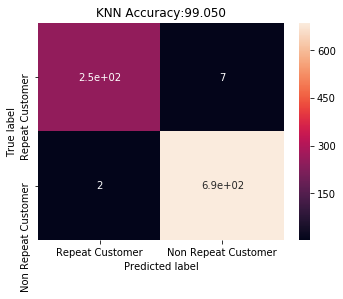

In [243]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN Accuracy:{0:.3f}'.format(accuracy_test_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [244]:
svm_clf = SVC()

In [245]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [246]:
svm_pred = svm_clf.predict(X_test)

In [247]:
svm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [248]:
print(confusion_matrix(y_test, svm_pred))

[[258   1]
 [  3 685]]


In [249]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, svm_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       0.99      1.00      0.99       259
Non Repeat Customer       1.00      1.00      1.00       688

        avg / total       1.00      1.00      1.00       947



In [250]:
accuracy_test_svm=round(svm_clf.score(X_test,y_test)*100,2)
accuracy_train_svm=round(svm_clf.score(X_train,y_train)*100,2)
accuracy_svm=round(accuracy_score(y_test, svm_pred)*100,2)
print('Training accuracy of SVM',accuracy_train_svm)
print('Testing accuracy of SVM',accuracy_test_svm)
print('Accuracy of SVM classifier:',accuracy_svm)

Training accuracy of SVM 99.95
Testing accuracy of SVM 99.58
Accuracy of SVM classifier: 99.58


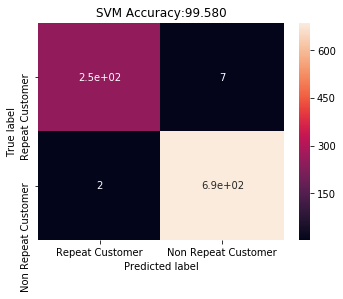

In [251]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Accuracy:{0:.3f}'.format(accuracy_test_svm))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [252]:
clf = MultinomialNB()

In [253]:
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [254]:
mnb_pred = clf.predict(X_test)

In [255]:
mnb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [256]:
print(confusion_matrix(y_test, mnb_pred))

[[ 73 186]
 [  3 685]]


In [257]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, mnb_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       0.96      0.28      0.44       259
Non Repeat Customer       0.79      1.00      0.88       688

        avg / total       0.83      0.80      0.76       947



In [258]:
accuracy_test_mnb=round(gaussnb_clf.score(X_test,y_test)*100,2)
accuracy_train_mnb=round(gaussnb_clf.score(X_train,y_train)*100,2)
accuracy_mnb=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of Multinomial Naive Bayes',accuracy_train_mnb)
print('Testing accuracy of Multinomial Naive Bayes',accuracy_test_mnb)
print('Accuracy of Multinomial Naive Bayes classifier:',accuracy_mnb)

Training accuracy of Multinomial Naive Bayes 79.7
Testing accuracy of Multinomial Naive Bayes 80.04
Accuracy of Multinomial Naive Bayes classifier: 100.0


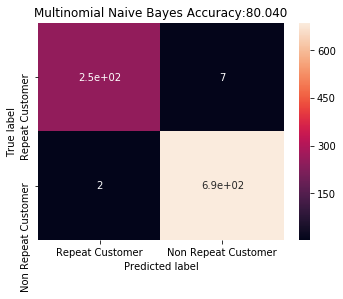

In [259]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Multinomial Naive Bayes Accuracy:{0:.3f}'.format(accuracy_test_gnb))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [260]:
clf = DecisionTreeClassifier(random_state = 86,
                               max_depth=2, min_samples_leaf=5)


In [261]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=86,
            splitter='best')

In [262]:
c_pred = clf.predict(X_test)

In [263]:
c_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [264]:
y_test.head()

,VisitPossibleNot
2580,1
1727,1
351,1
2483,1
1484,1


In [265]:
print(confusion_matrix(y_test, c_pred))

[[259   0]
 [  0 688]]


In [266]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, c_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       1.00      1.00      1.00       259
Non Repeat Customer       1.00      1.00      1.00       688

        avg / total       1.00      1.00      1.00       947



In [267]:
accuracy_test_CART=round(clf.score(X_test,y_test)*100,2)
accuracy_train_CART=round(clf.score(X_train,y_train)*100,2)
accuracy_CART=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of CART',accuracy_train_CART)
print('Testing accuracy of CART',accuracy_test_CART)
print('Accuracy of CART:',accuracy_CART)

Training accuracy of CART 100.0
Testing accuracy of CART 100.0
Accuracy of CART: 100.0


In [268]:
clf = DecisionTreeClassifier(criterion='entropy',random_state = 86,
                               max_depth=2, min_samples_leaf=5)

In [269]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=86,
            splitter='best')

In [270]:
id3_pred = clf.predict(X_test)

In [271]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, id3_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       1.00      1.00      1.00       259
Non Repeat Customer       1.00      1.00      1.00       688

        avg / total       1.00      1.00      1.00       947



In [272]:
accuracy_test_ID3=round(clf.score(X_test,y_test)*100,2)
accuracy_train_ID3=round(clf.score(X_train,y_train)*100,2)
accuracy_ID3=round(accuracy_score(y_test, id3_pred)*100,2)
print('Training accuracy of ID3',accuracy_train_ID3)
print('Testing accuracy of ID3',accuracy_test_ID3)
print('Accuracy of ID3:',accuracy_ID3)

Training accuracy of ID3 100.0
Testing accuracy of ID3 100.0
Accuracy of ID3: 100.0


In [273]:
clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [274]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [275]:
bag_pred = clf.predict(X_test)

In [276]:
target_names = ['Repeat Customer','Non Repeat Customer']
print(classification_report(y_test, bag_pred, target_names=target_names))

                     precision    recall  f1-score   support

    Repeat Customer       1.00      1.00      1.00       259
Non Repeat Customer       1.00      1.00      1.00       688

        avg / total       1.00      1.00      1.00       947



In [277]:
accuracy_test_Bag=round(clf.score(X_test,y_test)*100,2)
accuracy_train_Bag=round(clf.score(X_train,y_train)*100,2)
accuracy_Bag=round(accuracy_score(y_test, bag_pred)*100,2)
print('Training accuracy of Bagging KNN Classifier',accuracy_train_Bag)
print('Testing accuracy of Bagging KNN Classifier:',accuracy_test_Bag)
print('Accuracy of Bagging KNN Classifier:',accuracy_Bag)

Training accuracy of Bagging KNN Classifier 100.0
Testing accuracy of Bagging KNN Classifier: 100.0
Accuracy of Bagging KNN Classifier: 100.0


In [278]:
pprf1 = precision_recall_fscore_support(y_test, knn_pred, average='macro')
print("KNN precision_recall_fscore_support ", pprf1)
pps1 = precision_score(y_test, knn_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("KNN precision_score -> %.2f"%pps1)
prs1 = recall_score(y_test, knn_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("KNN recall_score -> %.2f"%prs1)
pf1=f1_score(y_test, knn_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, knn_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('KNN f1 score -> %.2f'%pf1)

KNN precision_recall_fscore_support  (0.9910124870754793, 0.9850329981143935, 0.9879695618481396, None)
KNN precision_score -> 0.99
KNN recall_score -> 0.99
f1_score 0.9879695618481396
KNN f1 score -> 0.99


In [279]:
pprf2 = precision_recall_fscore_support(y_test, svm_pred, average='macro')
print("SVM precision_recall_fscore_support ", pprf2)
pps2 = precision_score(y_test, svm_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("SVM precision_score -> %.2f"%pps2)
prs2 = recall_score(y_test, svm_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("SVM recall_score -> %.2f"%prs2)
pf2=f1_score(y_test, svm_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, svm_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('SVM f1 score -> %.2f'%pf2)

SVM precision_recall_fscore_support  (0.9935240105894574, 0.9958892655113585, 0.9946982420781547, None)
SVM precision_score -> 0.99
SVM recall_score -> 1.00
f1_score 0.9946982420781547
SVM f1 score -> 0.99


In [280]:
pprf3 = precision_recall_fscore_support(y_test, mnb_pred, average='macro')
print("Multinomial NB precision_recall_fscore_support ", pprf3)
pps3 = precision_score(y_test, mnb_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Multinomial NB precision_score -> %.2f"%pps3)
prs3 = recall_score(y_test, mnb_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Multinomial NB recall_score -> %.2f"%prs3)
pf3=f1_score(y_test, mnb_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, mnb_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('Multinomial NB f1 score -> %.2f'%pf3)

Multinomial NB precision_recall_fscore_support  (0.8734893347030033, 0.6387464083685014, 0.6572946684154596, None)
Multinomial NB precision_score -> 0.87
Multinomial NB recall_score -> 0.64
f1_score 0.6572946684154596
Multinomial NB f1 score -> 0.66


In [281]:
pprf4 = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("CART precision_recall_fscore_support ", pprf4)
pps4 = precision_score(y_test, c_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("CART precision_score -> %.2f"%pps4)
prs4 = recall_score(y_test, c_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("CART recall_score -> %.2f"%prs4)
pf4=f1_score(y_test, c_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('CART f1 score -> %.2f'%pf4)

CART precision_recall_fscore_support  (1.0, 1.0, 1.0, None)
CART precision_score -> 1.00
CART recall_score -> 1.00
f1_score 1.0
CART f1 score -> 1.00


In [282]:
pprf5 = precision_recall_fscore_support(y_test, id3_pred, average='macro')
print("ID3 precision_recall_fscore_support ", pprf5)
pps5 = precision_score(y_test, id3_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("ID3 precision_score -> %.2f"%pps5)
prs5 = recall_score(y_test, id3_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("ID3 recall_score -> %.2f"%prs5)
pf5=f1_score(y_test, id3_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, id3_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('ID3 f1 score -> %.2f'%pf5)

ID3 precision_recall_fscore_support  (1.0, 1.0, 1.0, None)
ID3 precision_score -> 1.00
ID3 recall_score -> 1.00
f1_score 1.0
ID3 f1 score -> 1.00


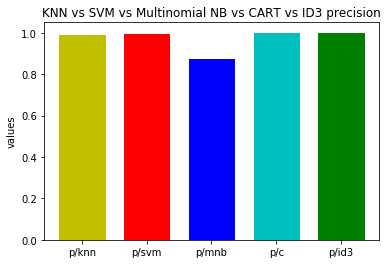

In [283]:
barlist=plt.bar(['p/knn','p/svm','p/mnb','p/c','p/id3'],[pps1,pps2,pps3,pps4,pps5],align='center', alpha=1.0,width=0.7)
barlist[0].set_color('y')
barlist[2].set_color('b')
barlist[4].set_color('g')
barlist[1].set_color('r')
barlist[3].set_color('c')
plt.ylabel('values')
plt.title('KNN vs SVM vs Multinomial NB vs CART vs ID3 precision')
plt.show()


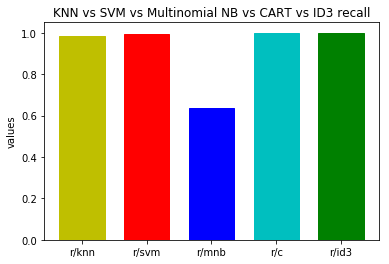

In [284]:
barlist=plt.bar(['r/knn','r/svm','r/mnb','r/c','r/id3'],[prs1,prs2,prs3,prs4,prs5],align='center', alpha=1.0,width=0.7)
barlist[0].set_color('y')
barlist[2].set_color('b')
barlist[4].set_color('g')
barlist[1].set_color('r')
barlist[3].set_color('c')
plt.ylabel('values')
plt.title('KNN vs SVM vs Multinomial NB vs CART vs ID3 recall')
plt.show()

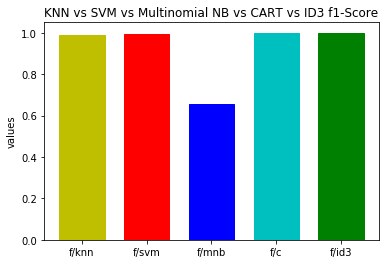

In [285]:
barlist=plt.bar(['f/knn','f/svm','f/mnb','f/c','f/id3'],[pf1,pf2,pf3,pf4,pf5],align='center', alpha=1.0,width=0.7)
barlist[0].set_color('y')
barlist[2].set_color('b')
barlist[4].set_color('g')
barlist[1].set_color('r')
barlist[3].set_color('c')
plt.ylabel('values')
plt.title('KNN vs SVM vs Multinomial NB vs CART vs ID3 f1-Score')
plt.show()

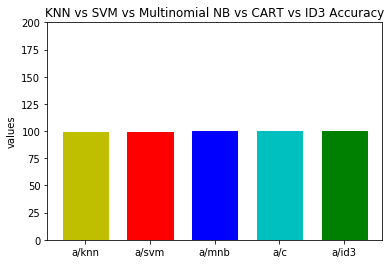

In [296]:
barlist=plt.bar(['a/knn','a/svm','a/mnb','a/c','a/id3'],[accuracy_knn,accuracy_svm,accuracy_mnb,accuracy_CART,accuracy_ID3],align='center', alpha=1.0,width=0.7
            )
barlist[0].set_color('y')
barlist[2].set_color('b')
barlist[4].set_color('g')
barlist[1].set_color('r')
barlist[3].set_color('c')
plt.ylabel('values')
x1,x2,y1,y2 = plt.axis()
#print(x1,x2,y1,y2)
plt.axis((x1,x2,0,200))
plt.title('KNN vs SVM vs Multinomial NB vs CART vs ID3 Accuracy')
plt.show()

